In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [385]:
data_train = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/training_set_for_turn_detection.xlsx')

In [386]:
data_test = pd.read_csv('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/test.csv')

In [387]:
y_test = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/y_test.xlsx')

In [388]:
data_train_classification = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/training_set_for_turn_classification.xlsx')

In [389]:
data_train.head()

,std,interquartilerange,range,variance,feature
0,1.893093,0.744145,6.10639,3.583801,0
1,12.137999,11.900842,45.21478,147.331026,1
2,3.861983,2.967290,13.48541,14.914914,0
3,2.806293,1.340335,10.49092,7.875282,0
4,4.436192,7.716569,11.91696,19.679798,0


In [390]:
data_test.head()

,time_stamp,ori,Unnamed: 2,Unnamed: 3
0,1582892149513,183.32074,-23.296076,-8.208767
1,1582892149530,183.43580,-23.217299,-8.004543
2,1582892149550,183.55615,-22.962630,-7.778291
3,1582892149570,183.67781,-22.410380,-7.610994
4,1582892149588,183.78986,-22.059351,-7.418176


In [391]:
x_train = data_train.drop('feature', axis=1)

In [392]:
x_train

,std,interquartilerange,range,variance
0,1.893093,0.744145,6.10639,3.583801
1,12.137999,11.900842,45.21478,147.331026
2,3.861983,2.967290,13.48541,14.914914
3,2.806293,1.340335,10.49092,7.875282
4,4.436192,7.716569,11.91696,19.679798
...,...,...,...,...
76,0.404348,0.373337,1.47731,0.163497
77,1.453080,1.583342,4.87724,2.111441
78,0.853801,0.680217,2.70630,0.728977
79,7.509932,8.070282,21.75329,56.399084


In [393]:
y_train = data_train['feature']

In [394]:
y_train

0     0
1     1
2     0
3     0
4     0
     ..
76    0
77    0
78    0
79    1
80    1
Name: feature, Length: 81, dtype: int64

In [395]:
y_test = y_test['feature']

In [396]:
y_test

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
Name: feature, dtype: int64

In [397]:
data_test

,time_stamp,ori,Unnamed: 2,Unnamed: 3
0,1582892149513,183.32074,-23.296076,-8.208767
1,1582892149530,183.43580,-23.217299,-8.004543
2,1582892149550,183.55615,-22.962630,-7.778291
3,1582892149570,183.67781,-22.410380,-7.610994
4,1582892149588,183.78986,-22.059351,-7.418176
...,...,...,...,...
3242,1582892211669,247.86797,-12.165248,-4.408528
3243,1582892211688,247.90600,-12.178048,-4.348655
3244,1582892211709,247.95145,-12.298545,-4.349805
3245,1582892211729,248.02710,-12.533242,-4.275261


In [398]:
# Dividing the data into windows
time_stamp_windows = []

last = len(data_test) // 100

for i in range(last):
    time_stamp_windows.append(data_test.iloc[i*100:i*100+100]['time_stamp'])
    
time_stamp_windows.append(data_test.iloc[last*100:-1]['time_stamp'])

In [399]:
# Dividing the data 'ori' column into windows
windows = []

last = len(data_test) // 100

for i in range(last):
    windows.append(data_test.iloc[i*100:i*100+100]['ori'])
    
windows.append(data_test.iloc[last*100:-1]['ori'])

In [400]:
len(windows)

33

In [401]:
firstquart = []
secondquart = []
thirdquart = []
for var in windows: 
    var1quart = var.quantile(.25)
    var2quart = var.quantile(.5)
    var3quart = var.quantile(.75)
    firstquart.append(var1quart.transpose())
    secondquart.append(var2quart.transpose())
    thirdquart.append(var2quart.transpose())
    

In [402]:
i=1
for x in windows:
    y=x
    y.to_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/window/window'+str(i)+'.xlsx')
    y = x.describe()
    y['interquartilerange'] = thirdquart[i-1] - firstquart[i-1]
    y['range'] = y['max'] - y['min']
    y['variance'] = y['std']**2
    y.to_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/feature/feature'+str(i)+'.xlsx')
    i+=1


In [403]:
y

count                  46.000000
mean                  247.547621
std                     0.373976
min                   246.874150
25%                   247.114370
50%                   247.742180
75%                   247.821240
max                   248.027100
interquartilerange      0.627810
range                   1.152950
variance                0.139858
Name: ori, dtype: float64

In [404]:
#detection_using_Logistic_Regression

In [405]:
from sklearn.linear_model import LogisticRegression

In [406]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [407]:
predictions = []
for i in range(1,len(windows)+1):
    df = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/feature/feature'+str(i)+'.xlsx')
    dff = pd.DataFrame(pd.Series({'std':df.loc[2,'ori'],'interquartilerange':df.loc[8,'ori'],'range':df.loc[9,'ori'], 'variance':df.loc[10,'ori']}))
    x_test=dff.transpose()
    predictions.append(logmodel.predict(x_test)[0])

In [408]:
predictions

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [409]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [410]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.80      1.00      0.89         4

    accuracy                           0.97        33
   macro avg       0.90      0.98      0.94        33
weighted avg       0.98      0.97      0.97        33



In [411]:
print(confusion_matrix(y_test,predictions))

[[28  1]
 [ 0  4]]


In [412]:
print(accuracy_score(y_test,predictions))

0.9696969696969697


In [413]:
marker = ['N']*len(windows)

In [414]:
j =0
for i in predictions:
    if i == 1:
        marker[j] = 'T'
    j=j+1

In [415]:
font_dict = {'family':'serif', 'color':'darkred', 'size':15 }

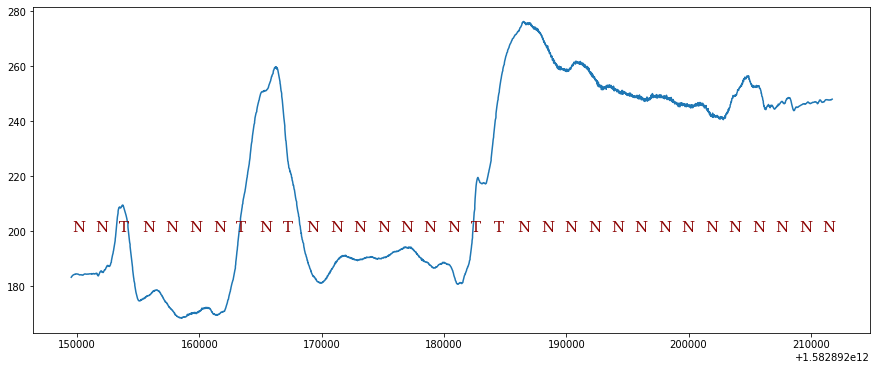

In [416]:
plt.figure(figsize = (15,6))
plt.plot(data_test['time_stamp'], data_test['ori'])
for i in range(len(marker)):
    plt.text(time_stamp_windows[i].iloc[0]+50, 200, marker[i], fontdict = font_dict)
plt.show()

In [451]:
#turn classification using KNN

In [452]:
data_train_classification.head()

,std,interquartilerange,range,variance,feature
0,12.137999,11.900842,45.214780,147.331026,2
1,15.193842,11.501765,51.695860,230.852846,2
2,10.127708,8.843763,36.871430,102.570471,1
3,10.235665,9.997918,34.889250,104.768834,2
4,10.916372,9.299293,34.937865,119.167180,1


In [453]:
X_train = data_train_classification.drop('feature', axis=1)

In [454]:
X_train

,std,interquartilerange,range,variance
0,12.137999,11.900842,45.214780,147.331026
1,15.193842,11.501765,51.695860,230.852846
2,10.127708,8.843763,36.871430,102.570471
3,10.235665,9.997918,34.889250,104.768834
4,10.916372,9.299293,34.937865,119.167180
5,12.931802,15.464475,44.843400,167.231499
6,11.178777,10.964158,35.516680,124.965051
7,13.304096,9.559440,39.813770,176.998973
8,10.356148,8.600248,31.888800,107.249794
9,14.907572,13.372647,42.441730,222.235712


In [455]:
Y_train = data_train_classification['feature']

In [456]:
Y_train

0     2
1     2
2     1
3     2
4     1
5     1
6     2
7     2
8     2
9     2
10    1
11    1
12    2
13    1
14    1
15    1
16    2
17    1
18    1
19    2
20    1
21    1
22    1
23    1
24    1
25    2
26    2
27    2
28    2
29    1
Name: feature, dtype: int64

In [457]:
from sklearn.preprocessing import StandardScaler

In [458]:
scaler = StandardScaler()

In [459]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [460]:
scaled_features = scaler.transform(X_train)

In [461]:
X_train_df = pd.DataFrame(scaled_features,columns=X_train.columns)
X_train_df

,std,interquartilerange,range,variance
0,-0.072072,0.228435,0.564794,-0.175053
1,1.093093,0.094385,1.293762,1.096004
2,-0.838578,-0.798441,-0.373636,-0.856230
3,-0.797415,-0.410759,-0.596585,-0.822775
4,-0.537867,-0.645427,-0.591117,-0.603657
5,0.230598,1.425462,0.523022,0.127798
6,-0.437815,-0.086198,-0.526014,-0.515424
7,0.372550,-0.558044,-0.042693,0.276442
8,-0.751476,-0.880238,-0.934065,-0.785019
9,0.983941,0.722816,0.252891,0.964866


In [462]:
#Y_test = Y_test['feature']

In [463]:
#Y_test

In [464]:
j =0 
arr=[] 
for i in predictions: 
    j=j+1 
    if i == 1: 
        arr.append(j)

In [465]:
arr

[3, 8, 10, 18, 19]

In [466]:
from sklearn.neighbors import KNeighborsClassifier

In [467]:
X_test = pd.DataFrame()
for i in arr:
    df = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/feature/feature'+str(i)+'.xlsx')
    dfff = pd.DataFrame(pd.Series({'std':df.loc[2,'ori'],'interquartilerange':df.loc[8,'ori'],'range':df.loc[9,'ori'], 'variance':df.loc[10,'ori']}))
    new_df=dfff.transpose()
    X_test = X_test.append(new_df.iloc[0])
X_test = X_test[['std','interquartilerange','range','variance']]


In [468]:
X_test

,std,interquartilerange,range,variance
0,13.717925,16.989567,34.84700,188.181454
0,17.468361,13.222048,59.73067,305.143644
0,15.304437,13.086150,55.95564,234.225789
0,10.237452,3.553090,42.90860,104.805424
0,11.198991,11.443770,38.43821,125.417409


In [469]:
scaler = StandardScaler()
scaler.fit(X_test)
scaled_features1 = scaler.transform(X_test)

In [470]:
X_test_df = pd.DataFrame(scaled_features1,columns=X_test.columns)
X_test_df.head()

,std,interquartilerange,range,variance
0,0.050110,1.200115,-1.179054,-0.046219
1,1.468580,0.351914,1.365757,1.556327
2,0.650152,0.321318,0.979691,0.584653
3,-1.266255,-1.824908,-0.354608,-1.188587
4,-0.902587,-0.048439,-0.811787,-0.906174


In [474]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_df,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [475]:
predictions2 = knn.predict(X_test_df)

In [476]:
predictions2

array([1, 2, 2, 1, 1])

In [477]:
predictions2= np.delete(predictions2,0)

In [478]:
predictions2

array([2, 2, 1, 1])

In [479]:
Test = [2,1,2,2]

In [480]:
from sklearn.metrics import classification_report,confusion_matrix

In [481]:
print(confusion_matrix(Test,predictions2))

[[0 1]
 [2 1]]


In [482]:
print(classification_report(Test,predictions2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.33      0.40         3

    accuracy                           0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4



In [483]:
print(accuracy_score(Test,predictions2))

0.25


In [448]:
error_rate = []

# Will take some time
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_df,Y_train)
    pred_i = knn.predict(X_test_df)
    error_rate.append(np.mean(pred_i != Test))

/home/surbhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':
/home/surbhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':
/home/surbhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':
/home/surbhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':
/home/surbhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':
/home/surbhi/anacond

In [449]:
error_rate

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'Error Rate')

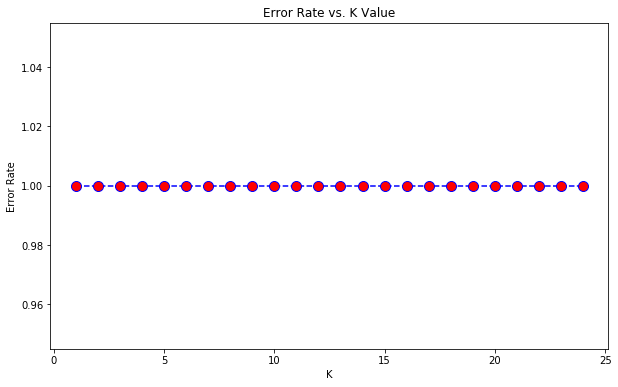

In [450]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')